In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
poisson1 = stats.poisson.rvs(mu=55, size=200000)
poisson2 = stats.poisson.rvs(mu=10, size=100000)
population = np.concatenate((poisson1, poisson2))

In [3]:
population.mean()

39.99977333333333

In [22]:
sample = np.random.choice(population, size=1000)

In [5]:
sample_mean = sample.mean()
sample_mean

39.448

In [6]:
data = (
    (["red"] * 50000) + (["blue"] * 30000) + (["green"] * 10000) + (["white"] * 10000)
)

In [7]:
sample = random.sample(data, 100)

for color in set(sample):
    print(color + " proportion estimate:")
    print(sample.count(color) / 100)

blue proportion estimate:
0.33
red proportion estimate:
0.51
green proportion estimate:
0.08
white proportion estimate:
0.08


In [8]:
# for a confidence level of 0.95

z = stats.norm.ppf(q=0.975)
z

1.959963984540054

In [10]:
pop_std = population.std()
pop_std

22.13411966358625

In [12]:
margin_of_error = z * (pop_std / np.sqrt(1000))
margin_of_error

1.3718617411925471

In [14]:
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
confidence_interval

(38.076138258807454, 40.81986174119255)

ie we can say with 95% confidence interval that mean of the pop falls within interval

In [15]:
intervals = []
sample_means = []

for sample in range(10):
    sample = np.random.choice(population, size=1000)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    pop_std = population.std()
    margin_of_error = z * (pop_std / np.sqrt(1000))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    intervals.append(confidence_interval)

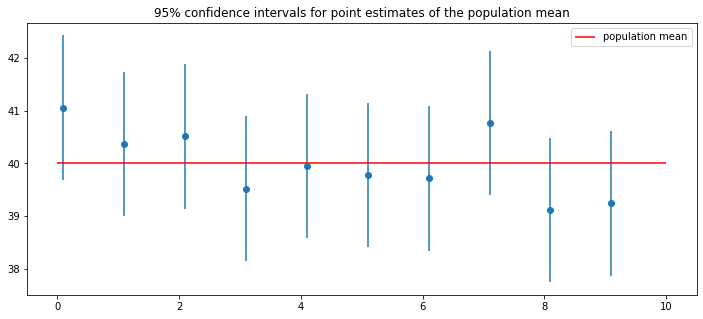

In [16]:
plt.figure(figsize=(12, 5))

plt.errorbar(
    x=np.arange(0.1, 10, 1),
    y=sample_means,
    yerr=[(top - bot) / 2 for top, bot in intervals],
    fmt="o",
)

plt.hlines(xmin=0, xmax=10, y=population.mean(), color="red", label="population mean")
plt.legend()
plt.title("95% confidence intervals for point estimates of the population mean")
plt.show()

In [17]:
sample_small = np.random.choice(population, size=10)
sample_small_mean = sample_small.mean()
sample_small_mean

45.3

In [18]:
t = stats.t.ppf(q=0.975, df=9)
t

2.2621571627409915

In [19]:
sigma = sample_small.std() / np.sqrt(10)
margin_of_error = t * sigma
confidence_interval = (
    sample_small_mean - margin_of_error,
    sample_small_mean + margin_of_error,
)
confidence_interval

(32.49511138344896, 58.10488861655104)

In [20]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 9,                     # Degrees of freedom
                 loc = sample_small_mean,   # Sample mean
                 scale = sigma)             # Standard deviation estimate

(32.49511138344896, 58.10488861655104)

In [21]:
for confidence in (0.5, 0.75, 0.8, 0.90, 0.95):
    confidence_interval = stats.t.interval(
        alpha=confidence, df=9, loc=sample_small_mean, scale=sigma
    )
    interval = round(confidence_interval[1] - confidence_interval[0], 2)
    print(confidence, interval)  # 0.95 26.43

0.5 7.96
0.75 13.92
0.8 15.66
0.9 20.75
0.95 25.61
